In [2]:
!pip install graphlearning
!pip install pyvis
from  ot_class import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 748.9/748.9 KB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.5 MB/s eta 0:00:00
  Created wheel for pyvis: filename=pyvis-0.3.1-py3-none-any.whl size=755850 sha256=696713fdffc192a3a427a12e01917594d42a1b0e8270541bc3d2c7a1d3f09863
  Stored in directory: /root/.cache/pip/wheels/a4/0c/61/8469ca276f96ab772c3acc7f47d71e9737cbdf6f446f017f48
Successfully built pyvis


# Create Datasets

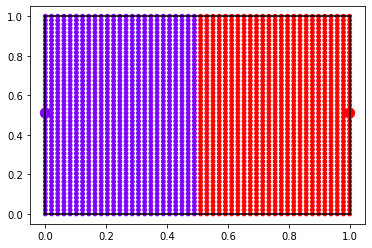

In [7]:
def find_occurence(arr, row):
    l = arr.tolist()
    return l.index(row.tolist())

x_left_horizontal = np.zeros(200 + 1)
y_left_horizontal = np.linspace(0, 1, 200 + 1)
plt.plot(x_left_horizontal,y_left_horizontal, c = 'black')

x_right_horizontal = np.ones(200 + 1)
y_right_horizontal = np.linspace(0, 1, 200 + 1)
plt.plot(x_right_horizontal,y_right_horizontal, c = 'black')

x_upper_vertical = np.linspace(0, 1, 200 + 1)
y_upper_vertical = np.ones(200 + 1)
plt.plot(x_upper_vertical,y_upper_vertical, c = 'black')

x_lower_vertical = np.linspace(0, 1, 200 + 1)
y_lower_vertical = np.zeros(200 + 1)
plt.plot(x_lower_vertical,y_lower_vertical, c = 'black')


xv, yv = np.meshgrid(np.linspace(0, 1, 50), np.linspace(0, 1, 50))
X = np.array([xv.flatten(), yv.flatten()]).T
plt.scatter(X[:, 0], X[:, 1], c = 'blue', s = 1)

train_ind = np.array([find_occurence(X, np.array([0, 25/49])), find_occurence(X, np.array([1, 25/49])) ])
train_labels = np.array([0, 1])

W = gl.weightmatrix.knn(X,10).toarray()
model = gl.ssl.poisson(W, solver='gradient_descent')
u = model.fit(train_ind, train_labels)
pred_labels = model.predict()
plt.scatter(X[:, 0], X[:, 1], c = pred_labels, s = 15,  cmap = 'rainbow')
plt.scatter(X[train_ind, 0], X[train_ind, 1], c = train_labels, s = 100,  cmap = 'rainbow')

plt.show()

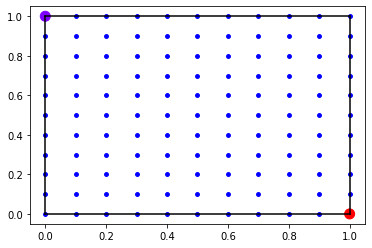

In [8]:
n = 11
x_left_horizontal = np.zeros(200 + 1)
y_left_horizontal = np.linspace(0, 1, 200 + 1)
plt.plot(x_left_horizontal,y_left_horizontal, c = 'black')

x_right_horizontal = np.ones(200 + 1)
y_right_horizontal = np.linspace(0, 1, 200 + 1)
plt.plot(x_right_horizontal,y_right_horizontal, c = 'black')

x_upper_vertical = np.linspace(0, 1, 200 + 1)
y_upper_vertical = np.ones(200 + 1)
plt.plot(x_upper_vertical,y_upper_vertical, c = 'black')

x_lower_vertical = np.linspace(0, 1, 200 + 1)
y_lower_vertical = np.zeros(200 + 1)
plt.plot(x_lower_vertical,y_lower_vertical, c = 'black')


xv, yv = np.meshgrid(np.linspace(0, 1, n), np.linspace(0, 1, n))
X = np.array([xv.flatten(), yv.flatten()]).T
plt.scatter(X[:, 0], X[:, 1], c = 'blue', s = 15)

train_ind = np.array([find_occurence(X, np.array([0, 1])), find_occurence(X, np.array([1, 0])) ])
train_labels = np.array([0, 1])

plt.scatter(X[train_ind, 0], X[train_ind, 1], c = train_labels, s = 100,  cmap = 'rainbow')

plt.show()

# Train Models

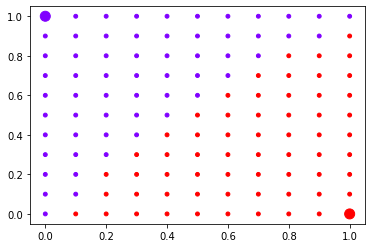

In [10]:
W = gl.weightmatrix.knn(X,5).toarray()

models = {}
models['GraphLearn'] = gl.ssl.poisson(W, solver='gradient_descent')
pred_labels = models['GraphLearn'].fit_predict(train_ind, train_labels)

plt.scatter(X[:, 0], X[:, 1], c = pred_labels, s = 15,  cmap = 'rainbow')
plt.scatter(X[train_ind, 0], X[train_ind, 1], c = train_labels, s = 100,  cmap = 'rainbow')

########### Gradient Descent (w/ Jacobian) for p = 2
Energy = -10.12
Discrepancies = 0
Runtime = 0.39 min
########### Gradient Descent (w/ Jacobian) for p = 4
Energy = -11.34
Discrepancies = 3
Runtime = 0.76 min
########### Gradient Descent (w/ Jacobian) for p = 8
Energy = -11.83
Discrepancies = 2
Runtime = 2.01 min
########### Gradient Descent (w/ Jacobian) for p = 10
Energy = -11.84
Discrepancies = 2
Runtime = 2.02 min
########### Gradient Descent (w/ Jacobian) for p = 20
Energy = -11.73
Discrepancies = 4
Runtime = 3.22 min
########### Gradient Descent (w/ Jacobian) for p = 40
Energy = -11.55
Discrepancies = 4
Runtime = 4.81 min
########### Gradient Descent (w/ Jacobian) for p = 60
Energy = -11.34
Discrepancies = 4
Runtime = 4.65 min
########### Gradient Descent (w/ Jacobian) for p = 80
Energy = -10.60
Discrepancies = 4
Runtime = 4.57 min
########### Gradient Descent (w/ Jacobian) for p = 100
Energy = -7.58
Discrepancies = 4
Runtime = 0.08 min
########### Gradient Descent (w/ Jacobia

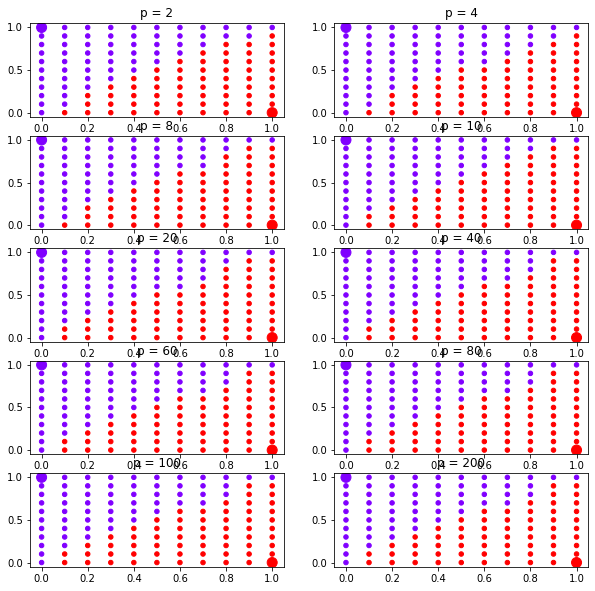

In [11]:
p_vals = [2, 4, 8, 10, 20, 40, 60, 80, 100, 200]
fig, ax = plt.subplots(len(p_vals)//2 , 2, figsize = (10, 10)) 

model = gl.ssl.poisson(W, solver='gradient_descent')
my_u = model.fit(train_ind, train_labels)
euclidean_labels = euclidean_basis(train_labels, 2)

i = 0
for axis in ax.flat:
    start_time = time.time()
    p = p_vals[i]
    models[p] = ppoisson(p, W)

    my_u = models[p].fit(train_ind, euclidean_labels, start = my_u.flatten())
    my_pred_labels = models[p].predict()

    energy = np.around(penergy(my_u.flatten(), W, train_ind, euclidean_labels, p), 2)
    discrepancies = np.count_nonzero(my_pred_labels - pred_labels)
    end_time = time.time()
    minutes = (end_time - start_time)/60

    i += 1

    info_str = f"########### Gradient Descent (w/ Jacobian) for p = {p}\n"\
                f"Energy = {energy:.2f}\n"\
                f"Discrepancies = {discrepancies}\n"\
                f"Runtime = {minutes:.2f} min"

    print(info_str)
    axis.scatter(X[:, 0], X[:, 1], c = my_pred_labels, s = 20,  cmap = 'rainbow')
    axis.scatter(X[train_ind, 0], X[train_ind, 1], c = train_labels, s = 100,  cmap = 'rainbow')
    axis.set_title(f"p = {p}")

In [15]:
# Save or load models
#save_models(models, "square1.pickle")
#models = load_models()

# Compute Kantorovich classifiers 

In [31]:
n = 11**2
k = 2
mu = np.zeros((n,k))
mu[train_ind] = euclidean_basis(train_labels, 2) - [0.5, 0.5]

## Initialize at limit of p-Poisson learning for $ p \to \infty$

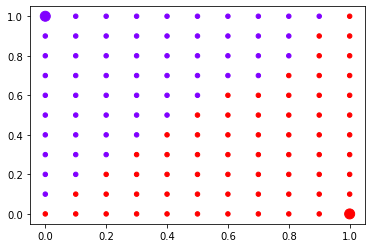

In [29]:
kantorovich_potential = wass_dist(W, mu, models[200].u, np.zeros((n,n,k)), threshold = 1e-3)
plt.scatter(X[:, 0], X[:, 1], c = predict(kantorovich_potential), s = 20,  cmap = 'rainbow')
plt.scatter(X[train_ind, 0], X[train_ind, 1], c = train_labels, s = 100,  cmap = 'rainbow')

## Initialize at $u = 0$

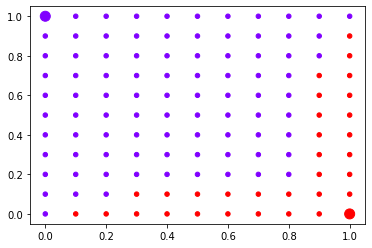

In [32]:
kantorovich_potential = wass_dist(W, mu, np.zeros((n,k)), np.zeros((n,n,k)), threshold = 1e-3)
plt.scatter(X[:, 0], X[:, 1], c = predict(kantorovich_potential), s = 20,  cmap = 'rainbow')
plt.scatter(X[train_ind, 0], X[train_ind, 1], c = train_labels, s = 100,  cmap = 'rainbow')